# Exploratory Data Analysis (EDA)
The goal of this notebook is to look into the data, to better understand them and gain meaningful insights

### Librairies and Configurations

In [3]:
import pandas as pd
import numpy as np
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [4]:
DATA_FOLDER = '../../data/godaddy-microbusiness-density-forecasting'

### Loading Data

In [5]:
# train file
train = pd.read_csv(f'{DATA_FOLDER}/train.csv')
train.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243


In [6]:
# test file
test = pd.read_csv(f'{DATA_FOLDER}/test.csv')
test.head()

,row_id,cfips,first_day_of_month
0,1001_2022-11-01,1001,2022-11-01
1,1003_2022-11-01,1003,2022-11-01
2,1005_2022-11-01,1005,2022-11-01
3,1007_2022-11-01,1007,2022-11-01
4,1009_2022-11-01,1009,2022-11-01


In [7]:
# census data
census = pd.read_csv(f'{DATA_FOLDER}/census_starter.csv')
print(census.shape)
census.head()

(3142, 26)


,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,74.5,78.1,81.8,85.1,87.9,1003,20.4,20.7,21.0,20.2,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
2,57.2,60.4,60.5,64.6,64.6,1005,7.6,7.8,7.6,7.3,...,0.5,0.3,0.8,1.1,0.8,33368,34186.0,32525,34990.0,36422.0
3,62.0,66.1,69.2,76.1,74.6,1007,8.1,7.6,6.5,7.4,...,1.2,1.4,1.6,1.7,2.1,43404,45340.0,47542,51721.0,54277.0
4,65.8,68.5,73.0,79.6,81.0,1009,8.7,8.1,8.6,8.9,...,1.3,1.4,0.9,1.1,0.9,47412,48695.0,49358,48922.0,52830.0


In [8]:
# submission file
submission = pd.read_csv(f'{DATA_FOLDER}/sample_submission.csv')
submission.sample(5)

,row_id,microbusiness_density
10218,19053_2023-02-01,3.817671
9498,2290_2023-02-01,3.817671
8840,48103_2023-01-01,3.817671
21772,53033_2023-05-01,3.817671
19814,21027_2023-05-01,3.817671


### Exploration

#### traning file

In [9]:
# number of rows

train.shape # we have like 100k row

(122265, 7)

In [10]:
# type of columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122265 entries, 0 to 122264
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   row_id                 122265 non-null  object 
 1   cfips                  122265 non-null  int64  
 2   county                 122265 non-null  object 
 3   state                  122265 non-null  object 
 4   first_day_of_month     122265 non-null  object 
 5   microbusiness_density  122265 non-null  float64
 6   active                 122265 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 6.5+ MB


In [11]:
# convert month of date to datetime
train['first_day_of_month'] = pd.to_datetime(train['first_day_of_month'])

# convert cfips
train['cfips'] = train['cfips'].astype(str)

In [12]:
# some statistic about data
train.describe()

,microbusiness_density,active
count,122265.000000,1.222650e+05
mean,3.817671,6.442858e+03
std,4.991087,3.304001e+04
min,0.000000,0.000000e+00
25%,1.639344,1.450000e+02
50%,2.586543,4.880000e+02
75%,4.519231,2.124000e+03
max,284.340030,1.167744e+06


In [13]:
# plot the evolution over time

<AxesSubplot:xlabel='first_day_of_month'>

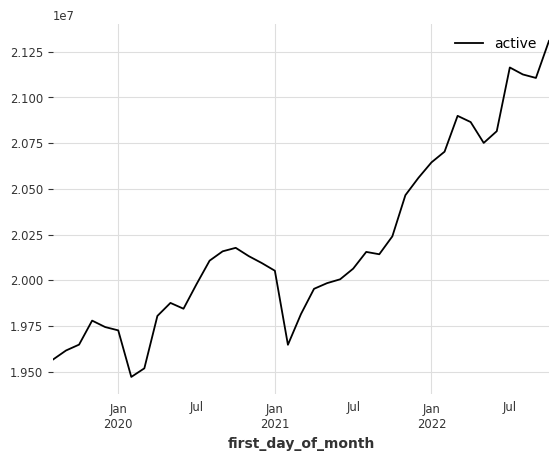

In [14]:
# global evolution of active business
df = train[['active', 'first_day_of_month']]
df.resample('M', on='first_day_of_month').sum().plot()

<AxesSubplot:xlabel='first_day_of_month'>

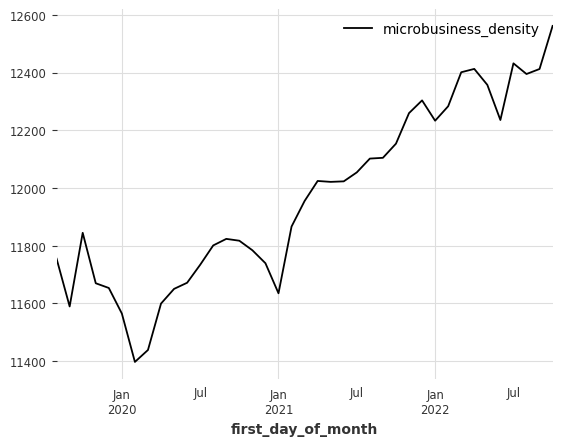

In [15]:
# global evolution of active business
df = train[['microbusiness_density', 'first_day_of_month']]
df.resample('M', on='first_day_of_month').sum().plot()

###

### Visualize per country

(39, 7)


<AxesSubplot:xlabel='first_day_of_month'>

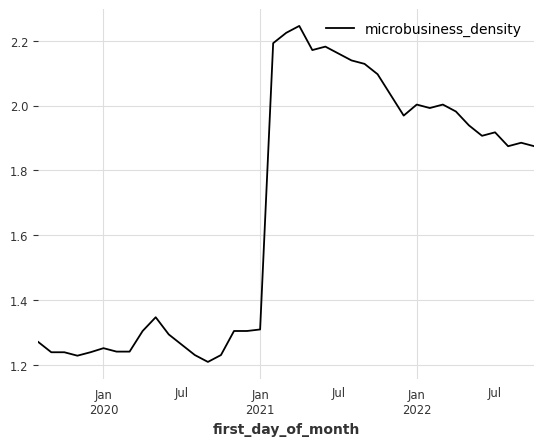

In [16]:
cifs_code = str(train.cfips.sample(1).to_list()[0])
df = train[train['cfips'] == cifs_code]
print(df.shape)
df = df[['microbusiness_density', 'first_day_of_month']]
df.resample('M', on='first_day_of_month').sum().plot()

#### Autocorrelation

In [19]:
# compute autocorrelation between active business
train['active'].autocorr(lag=3)

0.9256009777427918

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

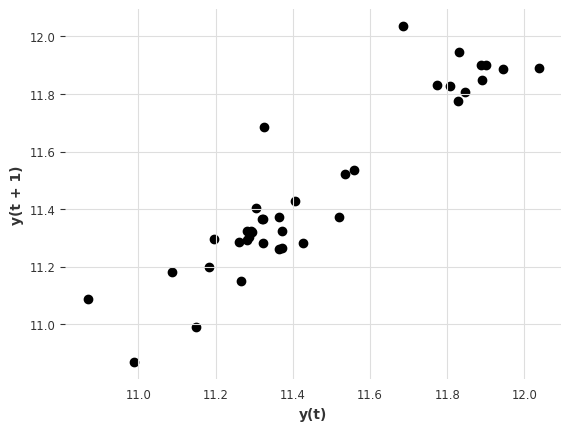

In [20]:
cifs_code = str(train.cfips.sample(1).to_list()[0])
df = train[train['cfips'] == cifs_code]
lag_plot(df['microbusiness_density'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

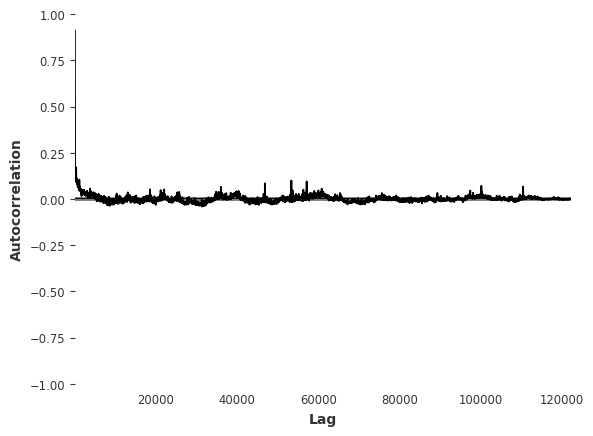

In [21]:
autocorrelation_plot(train['microbusiness_density'])

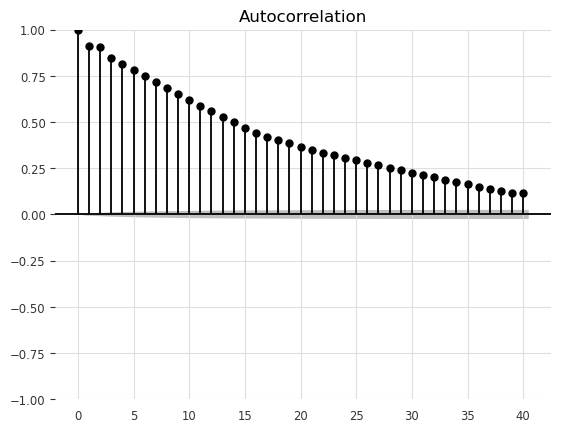

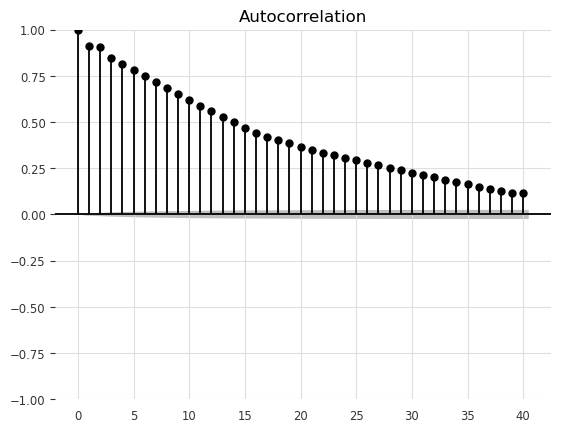

In [22]:
sm.graphics.tsa.plot_acf(train['microbusiness_density'], lags=40)

### Modeling

In [23]:
# split data into train and test
train_df = train[train['first_day_of_month'] < '2022-04-01']
test_df = train[train['first_day_of_month'] >= '2022-04-01']

In [24]:
train_df.shape

(100320, 7)

In [25]:
test_df.shape

(21945, 7)

In [26]:
# export to pickle in data folder
train_df.to_pickle(f'{DATA_FOLDER}/train.pkl')
test_df.to_pickle(f'{DATA_FOLDER}/test.pkl')

#### ARIMA

In [27]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters

In [28]:
df = train_df[['microbusiness_density', 'first_day_of_month']]
df.set_index(keys='first_day_of_month', inplace=True, drop=True)
df = df.sort_index()
# sum on every month
df = df.resample('M').mean()
df

,microbusiness_density
first_day_of_month,
2019-08-31,3.749621
2019-09-30,3.696846
2019-10-31,3.778263
2019-11-30,3.722510
2019-12-31,3.717284
2020-01-31,3.689041
2020-02-29,3.635546
2020-03-31,3.648742
2020-04-30,3.700048


NameError: name 'timeseries' is not defined

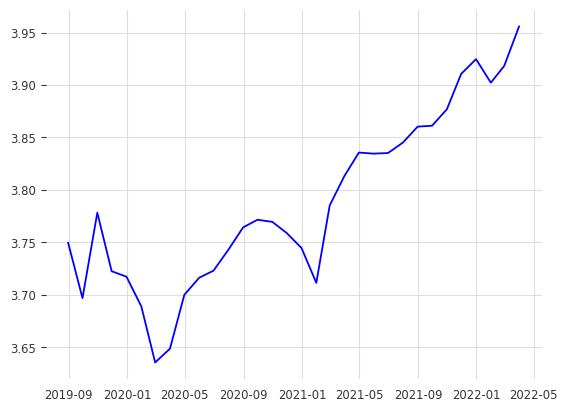

In [29]:
rolling_mean = df.rolling(window = 5).mean()
rolling_std = df.rolling(window = 5).std()
plt.plot(df, color = 'blue', label = 'Origine')
# def get_stationarity(timeseries):

# Statistiques mobiles
rolling_mean = timeseries.rolling(window=12).mean()
rolling_std = timeseries.rolling(window=12).std()

# tracé statistiques mobiles
original = plt.plot(timeseries, color='blue', label='Origine')
mean = plt.plot(rolling_mean, color='red', label='Moyenne Mobile')
std = plt.plot(rolling_std, color='black', label='Ecart-type Mobile')
plt.legend(loc='best')
plt.title('Moyenne et écart-type Mobiles')
plt.show(block=False)

# Test Dickey–Fuller :
result = adfuller(timeseries['Passengers'])
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

In [ ]:
result = adfuller(df['microbusiness_density'])

print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

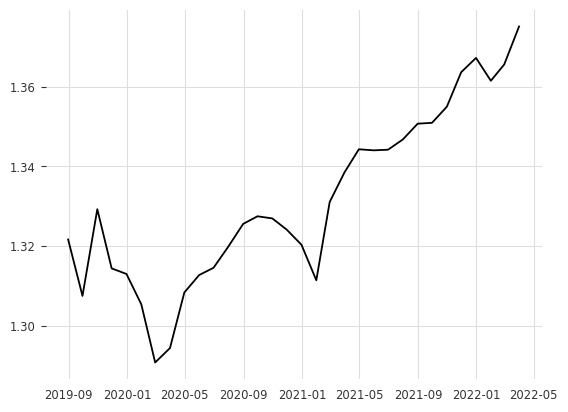

In [30]:
df_log = np.log(df)
plt.plot(df_log)

In [31]:
def get_stationarity(timeseries):

    # Statistiques mobiles
    rolling_mean = timeseries.rolling(window=3).mean()
    rolling_std = timeseries.rolling(window=3).std()

    # tracé statistiques mobiles
    original = plt.plot(timeseries, color='blue', label='Origine')
    mean = plt.plot(rolling_mean, color='red', label='Moyenne Mobile')
    std = plt.plot(rolling_std, color='black', label='Ecart-type Mobile')
    plt.legend(loc='best')
    plt.title('Moyenne et écart-type Mobiles')
    plt.show(block=False)

    # Test Dickey–Fuller :
    result = adfuller(timeseries['microbusiness_density'])
    print('Statistiques ADF : {}'.format(result[0]))
    print('p-value : {}'.format(result[1]))
    print('Valeurs Critiques :')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

In [32]:
df_log

,microbusiness_density
first_day_of_month,
2019-08-31,1.321655
2019-09-30,1.307480
2019-10-31,1.329264
2019-11-30,1.314398
2019-12-31,1.312993
2020-01-31,1.305367
2020-02-29,1.290759
2020-03-31,1.294383
2020-04-30,1.308346


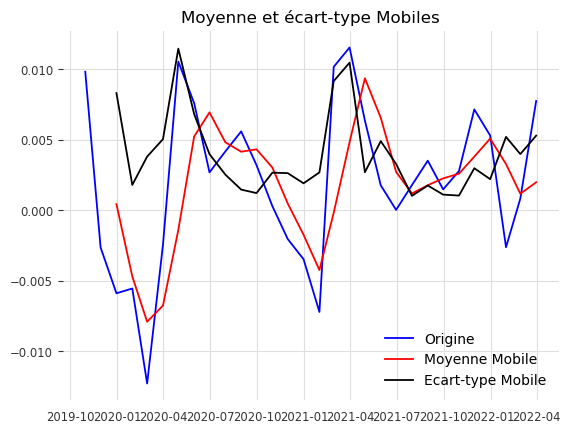

Statistiques ADF : -4.0851836083431525
p-value : 0.0010246058223135734
Valeurs Critiques :
	1%: -3.6889256286443146
	5%: -2.9719894897959187
	10%: -2.6252957653061224


In [33]:
rolling_mean = df_log.rolling(window=3).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

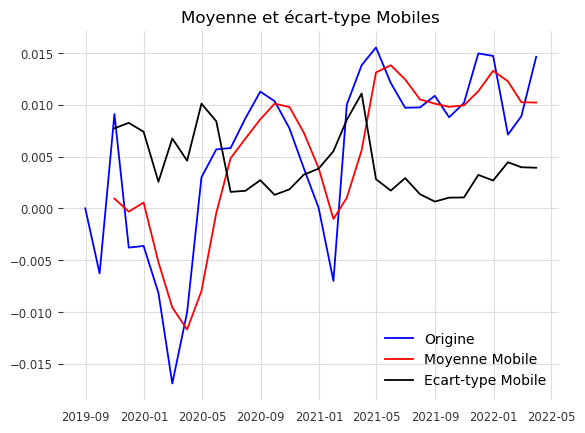

Statistiques ADF : -2.1915064979408743
p-value : 0.2093425377625786
Valeurs Critiques :
	1%: -3.6699197407407405
	5%: -2.9640707407407407
	10%: -2.621171111111111


In [34]:
rolling_mean_exp_decay = df_log.ewm(halflife=3, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

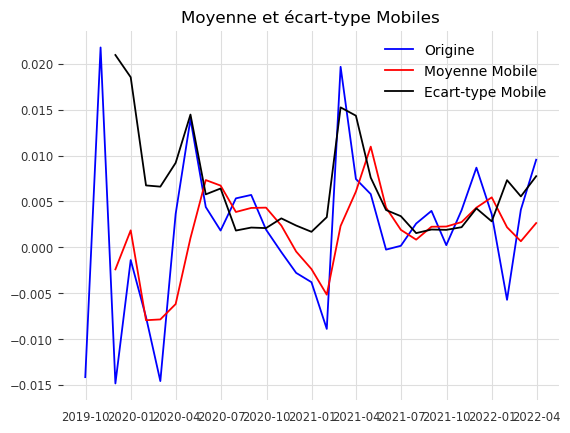

Statistiques ADF : -6.51832671037744
p-value : 1.0575272461449193e-08
Valeurs Critiques :
	1%: -3.6699197407407405
	5%: -2.9640707407407407
	10%: -2.621171111111111


In [35]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

In [36]:
import statsmodels

In [37]:
decomposition = seasonal_decompose(df_log)
model =  statsmodels.tsa.arima_model.ARIMA(df_log, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [38]:
import pmdarima as pm


In [39]:
model = pm.auto_arima(df, seasonal=True, m=3)


### Dart experiment

In [1]:
!pip install darts


Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 592.0/592.0 kB 1.9 MB/s eta 0:00:00
     -------------------------------------- 147.7/147.7 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 43.8/43.8 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 92.0/92.0 kB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 74.0/74.0 MB 3.1 MB/s eta 0:00:00
     -------------------------------------- 435.6/435.6 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 196.0/196.0 kB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 12.1/12.1 MB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 89.1/89.1 MB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00
     ----------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.


In [2]:
from darts import TimeSeries